# ZFNet

# 1. Environment Setup
## 1.0. Check GPU

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## 1.1. Install matplotlib

In [2]:
!pip install matplotlib

## 1.2. Import

In [3]:
import train

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

# 2. Data Preprocessing

In [4]:
batch_size = 128

In [5]:
train_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(256), transforms.RandomCrop(224), transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])])

test_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(256), transforms.TenCrop(224),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
    transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], 
                                                                       std=[0.1950, 0.1922, 0.1940])(crop) for crop in crops]))
    ])

train_dataset = torchvision.datasets.CIFAR10('../Dataset/cifar10/', train=True, download=True, transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

test_dataset = torchvision.datasets.CIFAR10('../Dataset/cifar10/', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


# 3. Train Model

In [6]:
num_classes = 10

gpu_id = 1
print_freq = 130
epoch_print = 20

save = True
epochs = 401

lr = 0.01
momentum = 0.9
weight_decay = 0.0005

In [7]:
ZFNet = train.ZFNet(num_classes=num_classes, gpu_id=gpu_id, print_freq=print_freq, epoch_print=epoch_print)

In [8]:
ZFNet.train(train_loader, test_loader, save, epochs, lr, momentum, weight_decay)

Epoch 1 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 130 - Train Loss : 2.3025, Test Loss : 2.3026, Train Acc : 7.8125, Test Acc : 10.0000
Saved Best Model

*********************************** Best Acc Updated ***********************************
Iteration : 260 - Train Loss : 2.3026, Test Loss : 2.3026, Train Acc : 12.5000, Test Acc : 10.4800
Saved Best Model
Iteration : 390 - Train Loss : 2.3026, Test Loss : 2.3026, Train Acc : 10.9375, Test Acc : 10.0000
Epoch 21 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 130 - Train Loss : 1.9157, Test Loss : 1.9036, Train Acc : 55.4688, Test Acc : 57.3300
Saved Best Model

*********************************** Best Acc Updated ***********************************
Iteration : 260 - Train Loss : 1.8380, Test Loss : 1.8867, Train Acc : 61.7188, Test Acc : 59.1600
Saved Best Model

*********************************** Be

Iteration : 130 - Train Loss : 1.4789, Test Loss : 1.6149, Train Acc : 98.4375, Test Acc : 87.8700
Iteration : 260 - Train Loss : 1.4859, Test Loss : 1.6117, Train Acc : 98.4375, Test Acc : 88.5400
Iteration : 390 - Train Loss : 1.4935, Test Loss : 1.6125, Train Acc : 96.8750, Test Acc : 88.4900
Epoch 381 Started...
Iteration : 130 - Train Loss : 1.4957, Test Loss : 1.6130, Train Acc : 97.6562, Test Acc : 88.1800
Iteration : 260 - Train Loss : 1.4793, Test Loss : 1.6152, Train Acc : 99.2188, Test Acc : 88.2100
Iteration : 390 - Train Loss : 1.4984, Test Loss : 1.6083, Train Acc : 97.6562, Test Acc : 88.4500
Epoch 401 Started...
Iteration : 130 - Train Loss : 1.5101, Test Loss : 1.6133, Train Acc : 95.3125, Test Acc : 88.4600
Iteration : 260 - Train Loss : 1.4845, Test Loss : 1.6141, Train Acc : 97.6562, Test Acc : 88.5200

*********************************** Best Acc Updated ***********************************
Iteration : 390 - Train Loss : 1.4852, Test Loss : 1.6088, Train Acc : 97.65

Text(0, 0.5, 'Accuracy')

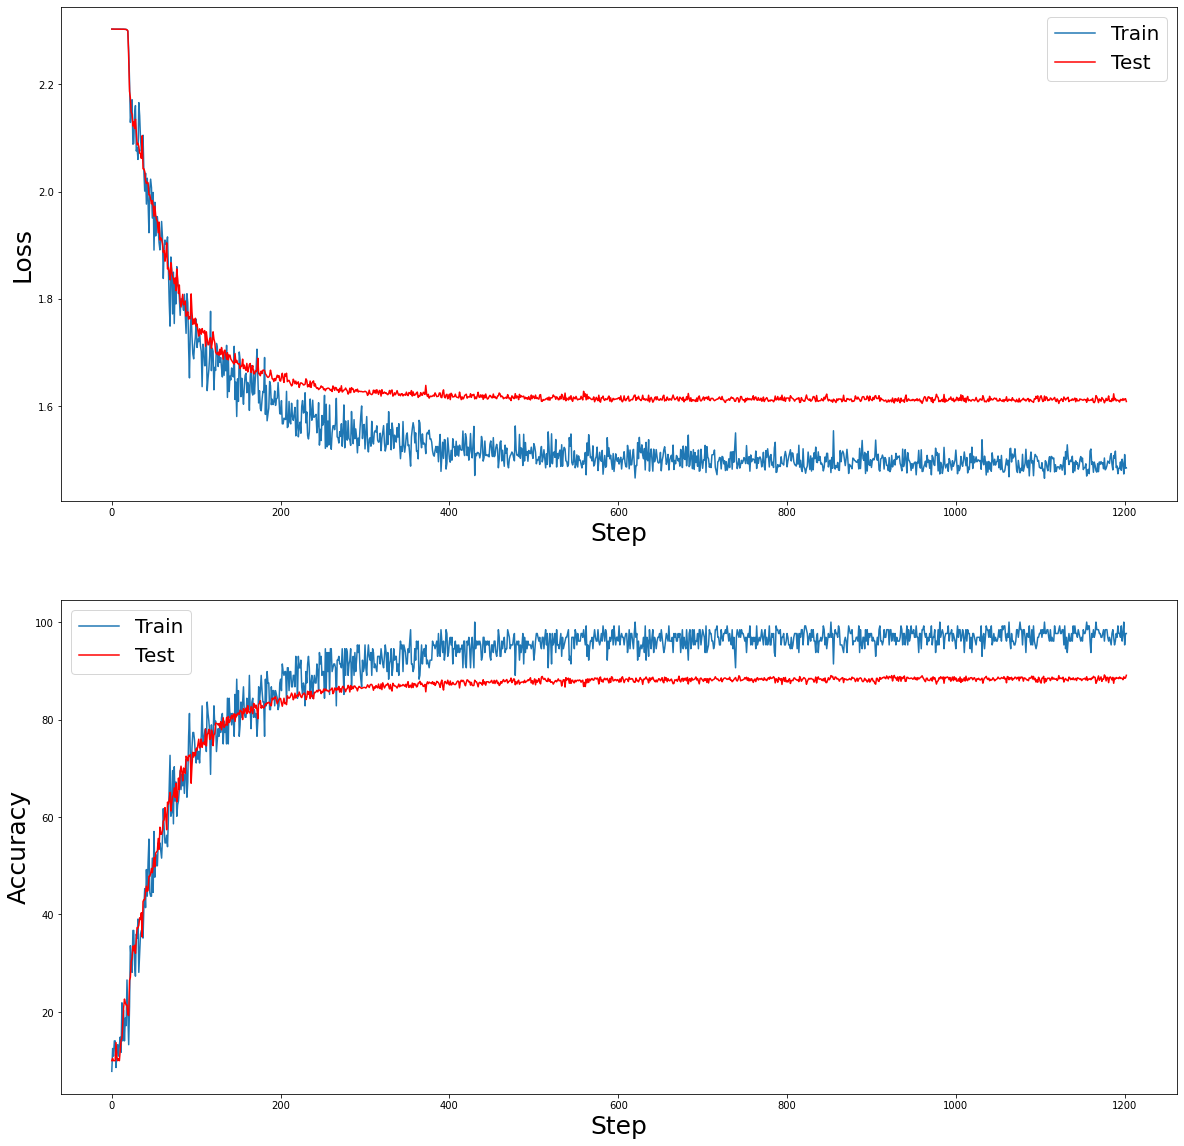

In [9]:
plt.figure(figsize=(20, 20))
plt.rcParams['axes.titlesize'] = 30
plt.axis('off')

label_fontsize = 25

plt.subplot(2, 1, 1)
train_lossline, = plt.plot(ZFNet.train_losses, label='Train')
test_lossline, = plt.plot(ZFNet.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)

plt.subplot(2, 1, 2)
train_accline, = plt.plot(ZFNet.train_acc, label='Train')
test_accline, = plt.plot(ZFNet.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)